## Breast cancer classification

### Binary classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('F:\csv/data/wisc_bc_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
df.shape

(569, 32)

For regression no need to scale the data

Except for ridge and Lasso in regression.

Scale the data for the classificstion models.

In [6]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [7]:
df['diagnosis'].replace({'B':0,'M':1},inplace=True)

In [8]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [10]:
# Applying 2sample t- test for the features of the dataset

from scipy.stats import ttest_ind

In [11]:
ttest_ind(df['diagnosis'],df['texture_se'])

Ttest_indResult(statistic=-27.444013161179843, pvalue=1.2755792087893532e-127)

In [12]:
ttest_ind(df['diagnosis'],df['dimension_mean'])

Ttest_indResult(statistic=15.268619822837241, pvalue=5.1394029045253113e-48)

In [13]:
ttest_ind(df['diagnosis'],df['smoothness_se'])

Ttest_indResult(statistic=18.01830421461817, pvalue=4.903360864341499e-64)

In [14]:
ttest_ind(df['diagnosis'],df['symmetry_se'])

Ttest_indResult(statistic=17.350600512869434, pvalue=5.298535632728561e-60)

In [15]:
ttest_ind(df['diagnosis'],df['dimension_se'])

Ttest_indResult(statistic=18.178387742008507, pvalue=5.139070369527091e-65)

In [16]:
ttest_ind(df['diagnosis'],df['symmetry_worst'])

Ttest_indResult(statistic=4.034218596826835, pvalue=5.844639711947698e-05)

In [17]:
my_set = ['texture_se','dimension_mean','smoothness_se','symmetry_se',
          'dimension_se','symmetry_worst']

In [18]:
AG = df.groupby('diagnosis')

In [24]:
AG_B = AG.get_group(0)
AG_M = AG.get_group(1)

In [25]:
for col in my_set:
    p_val = ttest_ind(AG_B[col],AG_M[col])[1]
    print(col,p_val)

texture_se 0.8433320287670163
dimension_mean 0.7599368037256238
smoothness_se 0.11029660865789295
symmetry_se 0.8766418183858812
dimension_se 0.06307355082239346
symmetry_worst 2.951120577154039e-25


Symmetry_worst is passing the p-test and rest all above 0.05 so remove them 

In [ ]:
#for col in cols:
    #p_val = ttest_ind(AG_B[col],AG_M[col])[1]
    #print(col,p_val)
    
    # TO check for whole dataset

In [36]:
X=df.drop(['id','diagnosis','texture_se','dimension_mean','smoothness_se','symmetry_se',
          'dimension_se'],axis=1)
y = df['diagnosis']

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                   569 non-null int64
diagnosis            569 non-null int64
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se     

In [38]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = sc.fit_transform(X)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [40]:
LR = LogisticRegression()
NB = GaussianNB()

In [41]:
models = []
models.append(('Logistic',LR))
models.append(('NaiveBayes',NB))

Logistic: 0.995822 (0.000015)
NaiveBayes: 0.983621 (0.000152)


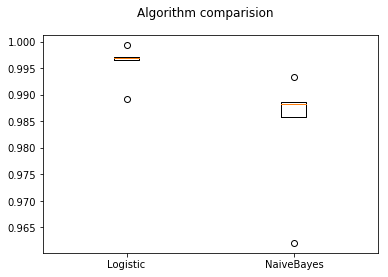

In [46]:
results = []
names = []
for name, model in models:
    kfold = KFold(shuffle=True,n_splits=5,random_state=0)
    cv_results = cross_val_score(model, X_std, y, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))
    
    # Box plot algorithm comparision
    
fig = plt.figure()
fig.suptitle('Algorithm comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()